## Methodology for Building a Neural Network for Recognizing Numbers in Images Using the MNIST Dataset


### Get Data


In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


### Example of Image


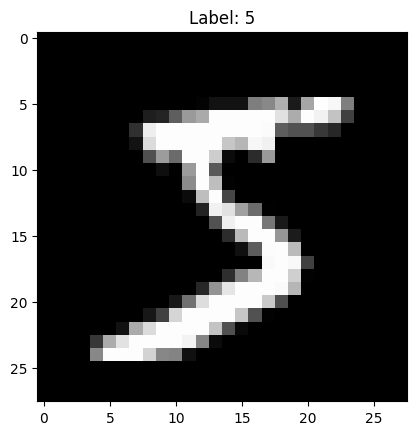

In [2]:
import matplotlib.pyplot as plt

image_index = 0 
selected_image = train_images[image_index]

plt.imshow(selected_image, cmap='gray')
plt.title(f'Label: {train_labels[image_index]}')
plt.show()

## Neural net


In [3]:
from keras.layers import Input, Flatten, Dense, Lambda
from keras.models import Sequential

model = Sequential()
model.add(Input(shape=(28, 28)))
model.add(Lambda(lambda x: x / 255.0))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                 │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

## Train model


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8805 - loss: 0.4063 - val_accuracy: 0.9658 - val_loss: 0.1102
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9685 - loss: 0.1042 - val_accuracy: 0.9699 - val_loss: 0.0954
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9801 - loss: 0.0646 - val_accuracy: 0.9736 - val_loss: 0.0828
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9829 - loss: 0.0517 - val_accuracy: 0.9746 - val_loss: 0.0816
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9872 - loss: 0.0373 - val_accuracy: 0.9775 - val_loss: 0.0807
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9910 - loss: 0.0264 - val_accuracy: 0.9769 - val_loss: 0.0785
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9926 - loss: 0.0229 - val_accuracy: 0.9747 - val_loss: 0.0984
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9932 - loss: 0.0210 - 

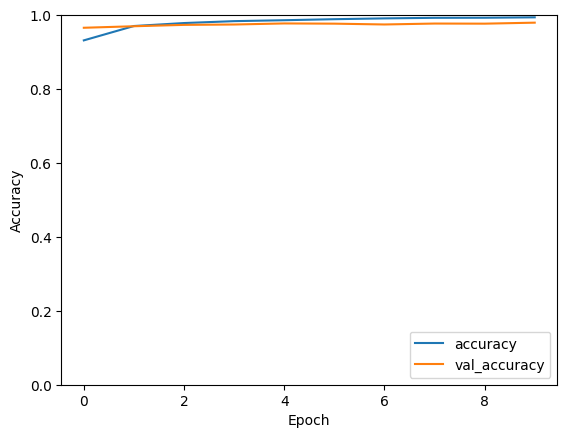

In [4]:
history = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=32,
    validation_data=(test_images, test_labels)
)

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()